## Load One-Hot Encoded Data

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Load the one-hot encoded dataset from an Excel file
file_path = r"C:\Users\keo\Downloads\Data_mine\one_hot_encoded_data_oneZero_2.0.xlsx"  # Change this to your actual file path
df = pd.read_excel(file_path)

# Ensure all values are binary (0 or 1)
df = df.astype(bool)  # Converts 1/0 to True/False for Apriori

# Generate frequent itemsets
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.4)

# Display the first few rules
print(rules.head())


##  Scatter Plot (Support vs Confidence)
📌 What It Visualizes:

- Plots support on the X-axis and confidence on the Y-axis.
- Each point represents an association rule.

🔎 How It Helps:

- Helps find rules with high support but low confidence (frequent but unreliable).
- Identifies rules with high confidence but low support (strong but rare).


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(x="support", y="confidence", size="lift", hue="lift", data=rules, palette="coolwarm", sizes=(20, 200))
plt.title("Association Rules (Support vs Confidence)")
plt.show()


## Heatmap of Lift Values
What It Visualizes:

- Shows the relationship between items based on support, confidence, or lift.
- Uses a color gradient to highlight strong vs. weak associations.

How It Helps:

- Quickly identifies strong rules with high confidence and lift.
- Helps find highly correlated item pairs in transactions.

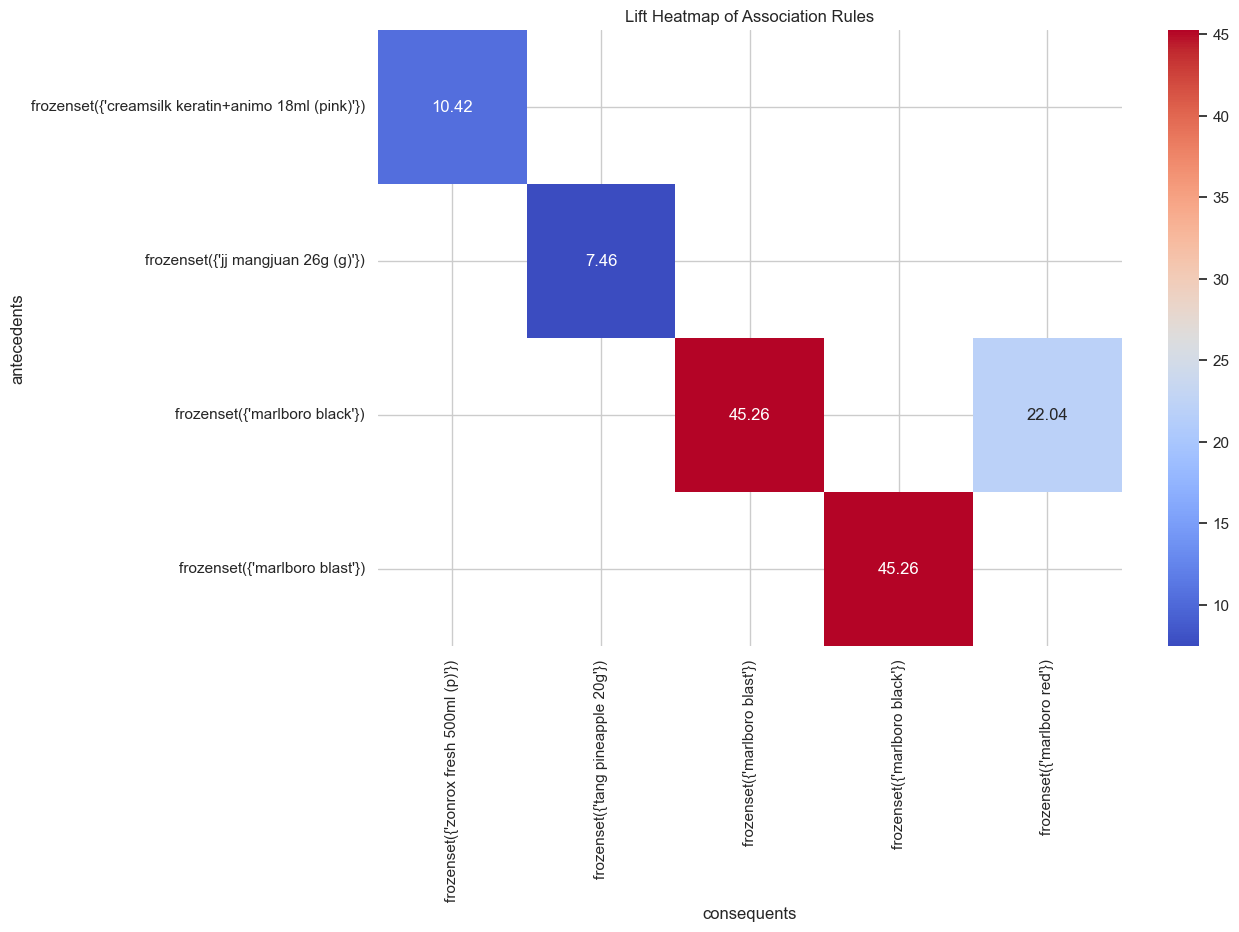

In [40]:
import numpy as np

# Pivot the rules dataframe for heatmap
pivot = rules.pivot(index="antecedents", columns="consequents", values="lift")

plt.figure(figsize=(12,8))
sns.heatmap(pivot, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Lift Heatmap of Association Rules")
plt.show()


## Bar Plot of Top Rules by Lift
What It Visualizes:

- A bar chart ranking association rules by lift.

How It Helps:

- Quickly identifies the strongest associations in your dataset.
- Helps businesses focus on high-lift item pairs for marketing, bundling, or recommendations.
- Can be filtered to show only the top N rules.

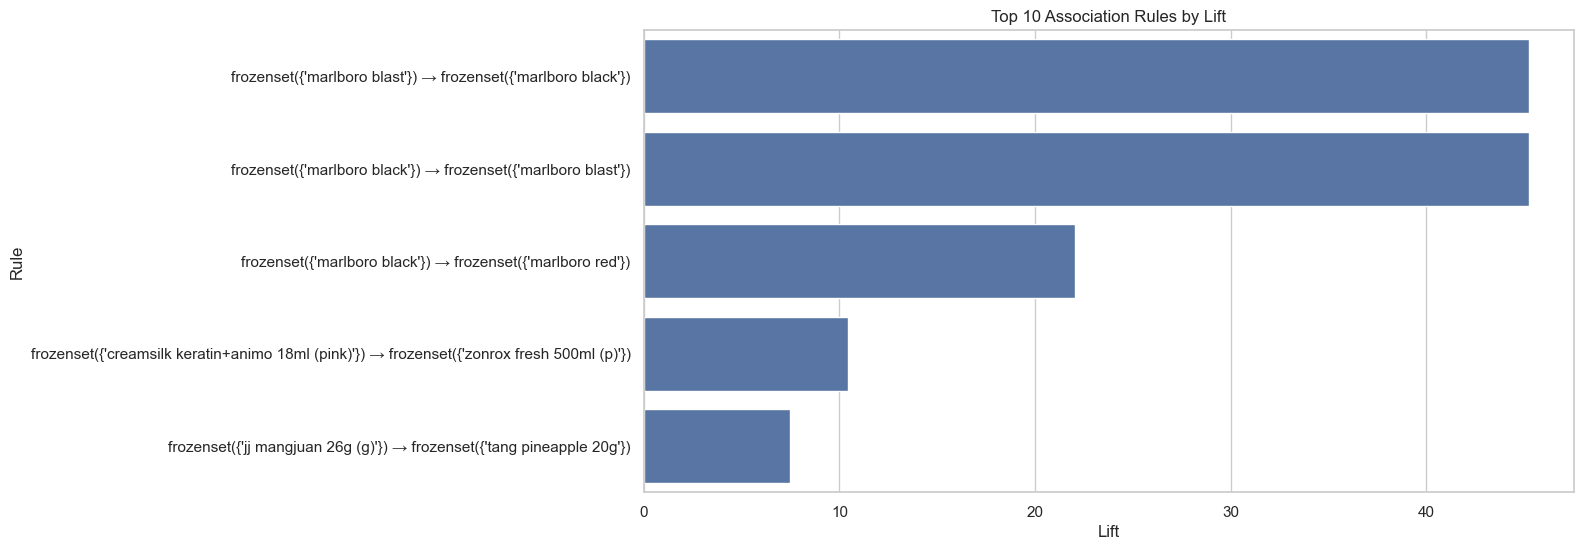

In [41]:
top_rules = rules.nlargest(10, 'lift')  # Get top 10 rules by lift

plt.figure(figsize=(12,6))
sns.barplot(x=top_rules["lift"], y=top_rules["antecedents"].astype(str) + " → " + top_rules["consequents"].astype(str))
plt.xlabel("Lift")
plt.ylabel("Rule")
plt.title("Top 10 Association Rules by Lift")
plt.show()


## Network Graph of Rules
What It Visualizes:

- Items are nodes, and edges represent association rules.
- Edge thickness shows rule strength (based on lift or confidence).

How It Helps:

- Shows how products are interconnected in customer transactions.
- Great for market basket analysis to see which items often appear together.

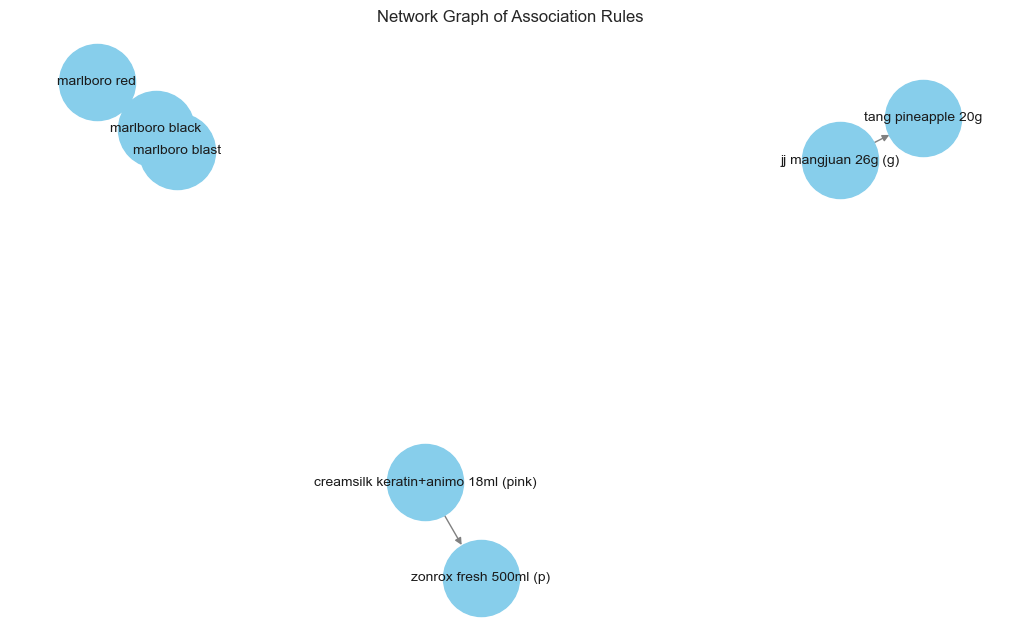

In [42]:
import networkx as nx

G = nx.DiGraph()

# Add edges to graph
for _, rule in rules.iterrows():
    for ante in rule["antecedents"]:
        for cons in rule["consequents"]:
            G.add_edge(ante, cons, weight=rule["lift"])

plt.figure(figsize=(10,6))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_color="skyblue", edge_color="gray", node_size=3000, font_size=10)
plt.title("Network Graph of Association Rules")
plt.show()


## Distribution of Lift Values
What It Visualizes:

- A histogram showing the frequency distribution of lift values.

How It Helps:

- Helps determine if most rules have strong, weak, or neutral relationships.
- A large number of rules with lift ≈ 1 means items are independent (no strong association).
- A high number of rules with lift >> 1 means strong positive associations exist.

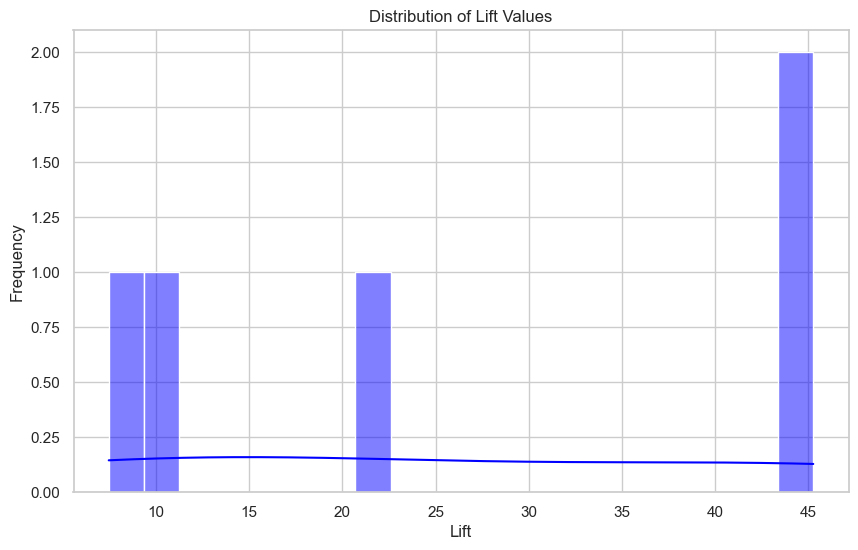

In [43]:
plt.figure(figsize=(10,6))
sns.histplot(rules["lift"], bins=20, kde=True, color="blue")
plt.xlabel("Lift")
plt.ylabel("Frequency")
plt.title("Distribution of Lift Values")
plt.show()


## Support vs Confidence Line Plot
What It Visualizes:

- Plots support on the X-axis and confidence on the Y-axis, but with a line instead of scatter points.

How It Helps:

- Highlights trends between support and confidence across rules.
- Helps understand if higher support leads to lower confidence (often the case in large datasets).
- Useful when comparing multiple min_support and min_confidence values.

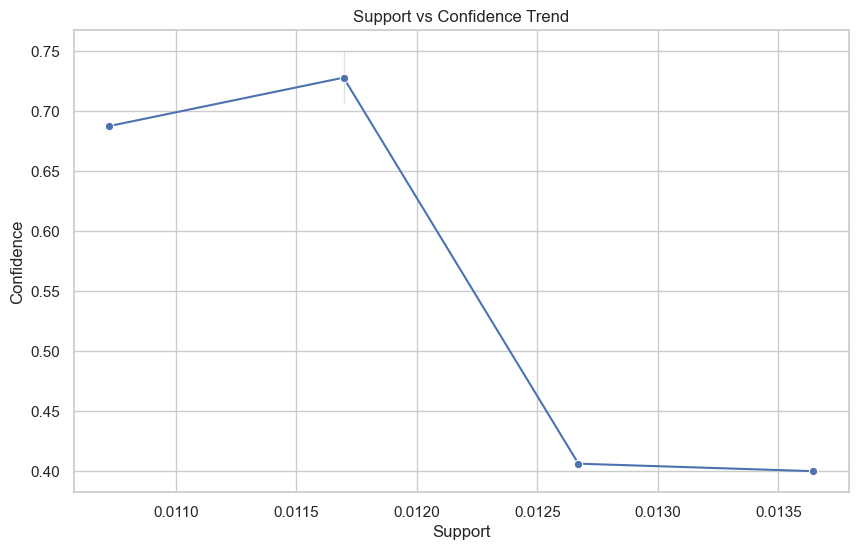

In [44]:
plt.figure(figsize=(10,6))
sns.lineplot(x="support", y="confidence", data=rules, marker="o", linestyle="-")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Support vs Confidence Trend")
plt.show()


## Boxplot of Confidence Values
What It Visualizes:

- A boxplot showing the distribution of confidence values across all rules.
- Displays median, quartiles, and potential outliers.

How It Helps:

- Shows whether confidence values are widely spread or clustered.
- Helps detect outlier rules with extremely high or low confidence.
- Useful for setting an appropriate min_confidence threshold.

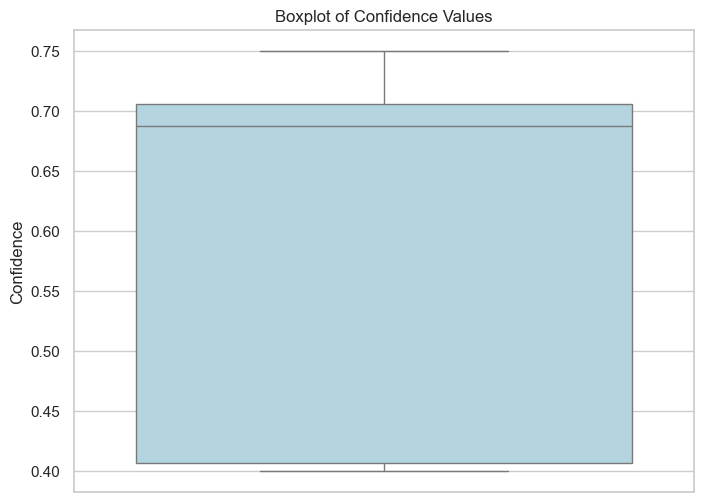

In [45]:
plt.figure(figsize=(8,6))
sns.boxplot(y=rules["confidence"], color="lightblue")
plt.ylabel("Confidence")
plt.title("Boxplot of Confidence Values")
plt.show()


## Parallel Coordinates Plot
What It Visualizes:

- Displays multiple rules in parallel lines, with each axis representing different metrics (support, confidence, lift).

How It Helps:

- Allows comparison of multiple rules across multiple metrics at once.
- Good for spotting rules that have consistently high values across all metrics.

In [46]:
from pandas.plotting import parallel_coordinates

# Select top 10 rules
top_rules = rules.nlargest(10, "lift")[["support", "confidence", "lift"]]
top_rules["rule"] = range(1, 11)  # Numbering rules

plt.figure(figsize=(12,6))
parallel_coordinates(top_rules, class_column="rule", colormap="coolwarm")
plt.title("Parallel Coordinates Plot of Rules")
plt.show()


ValueError: Length of values (10) does not match length of index (5)